In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings('ignore') 

In [2]:
try:
    data = pd.read_csv('Chittagong.csv')  
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Chittagong.csv' not found. Please ensure the file is in the working directory.")
    raise

Dataset loaded successfully.


In [3]:
print("\nInitial Data Head:")
display(data.head())


Initial Data Head:


,Unnamed: 0,Station,Year,Month,Day,Rainfall,Sunshine,Humidity,Temperature
0,82544,Chittagong,1961,1,1,0.0,0.7,76.0,22.2
1,82545,Chittagong,1961,1,2,0.0,4.9,72.0,23.7
2,82546,Chittagong,1961,1,3,0.0,0.5,85.0,22.3
3,82547,Chittagong,1961,1,4,0.0,8.3,81.0,23.1
4,82548,Chittagong,1961,1,5,0.0,9.5,53.0,20.9


In [4]:
columns_to_drop = ['Unnamed: 0', 'Station']
for col in columns_to_drop:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)
        print(f"Dropped column: {col}")
    else:
        print(f"Column '{col}' not found in the dataset.")

Dropped column: Unnamed: 0
Dropped column: Station


In [5]:
high_temp_threshold = 33  
cold_temp_threshold = 18 

In [6]:
def classify_weather(row):
    if row['Rainfall'] > 0:
        return 'Rain'
    elif row['Temperature'] > high_temp_threshold:
        return 'High Temperature'
    elif row['Temperature'] < cold_temp_threshold:
        return 'Cold'
    else:
        return 'Normal Temperature'

data['Weather'] = data.apply(classify_weather, axis=1)

In [7]:
try:
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
    print("Date column created successfully.")
except KeyError as e:
    print(f"Error: Missing column {e} required to create 'Date'.")
    raise
except Exception as e:
    print(f"Unexpected error while creating 'Date': {e}")
    raise

Date column created successfully.


In [8]:
date_columns = ['Year', 'Month', 'Day']
for col in date_columns:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)
        print(f"Dropped column: {col}")
    else:
        print(f"Column '{col}' not found in the dataset.")

Dropped column: Year
Dropped column: Month
Dropped column: Day


In [9]:
weather_map = {'Rain': 0, 'High Temperature': 1, 'Normal Temperature': 2, 'Cold': 3}
data['Weather'] = data['Weather'].map(weather_map)

In [10]:
if data['Weather'].isnull().any():
    print("Warning: Some 'Weather' entries could not be mapped and are set as NaN.")
    print(data[data['Weather'].isnull()])
    # Optionally, handle unmapped values here
    data['Weather'].fillna(-1, inplace=True)  # Example: Assign a new class or remove
    print("Filled NaN values in 'Weather' with -1.")

In [11]:
print("\nEncoded 'Weather' Column:")
print(data['Weather'].head())


Encoded 'Weather' Column:
0    2
1    2
2    2
3    2
4    2
Name: Weather, dtype: int64


In [12]:
data['Date'] = data['Date'].apply(lambda date: date.toordinal())

In [13]:
print("\nProcessed Data Head:")
display(data.head())


Processed Data Head:


,Rainfall,Sunshine,Humidity,Temperature,Weather,Date
0,0.0,0.7,76.0,22.2,2,715876
1,0.0,4.9,72.0,23.7,2,715877
2,0.0,0.5,85.0,22.3,2,715878
3,0.0,8.3,81.0,23.1,2,715879
4,0.0,9.5,53.0,20.9,2,715880


In [14]:
data.to_csv('Chittagong_update_preprocessed.csv', index=False)

In [15]:
sns.set(style="whitegrid")

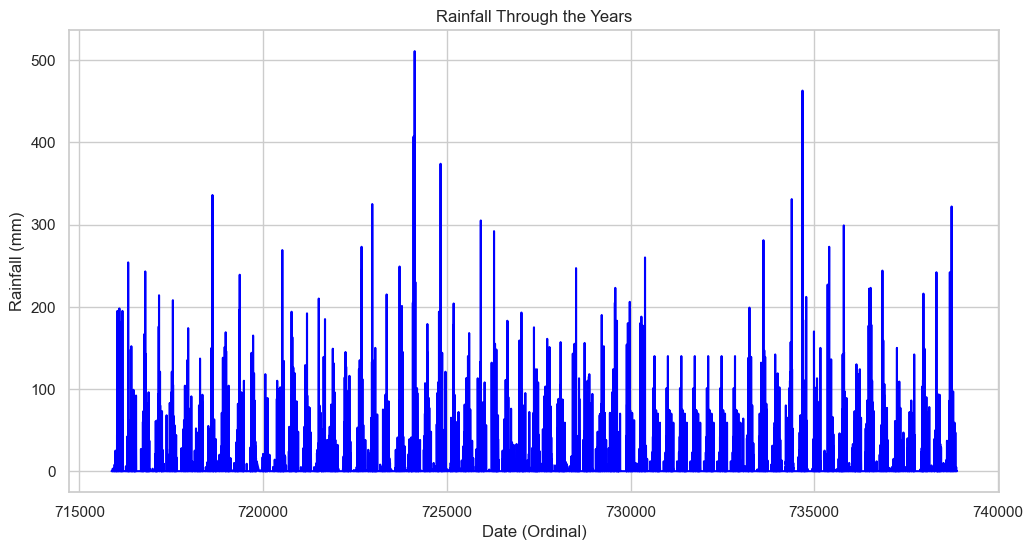

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Rainfall', data=data, color='blue')
plt.title('Rainfall Through the Years')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Rainfall (mm)')
plt.show()

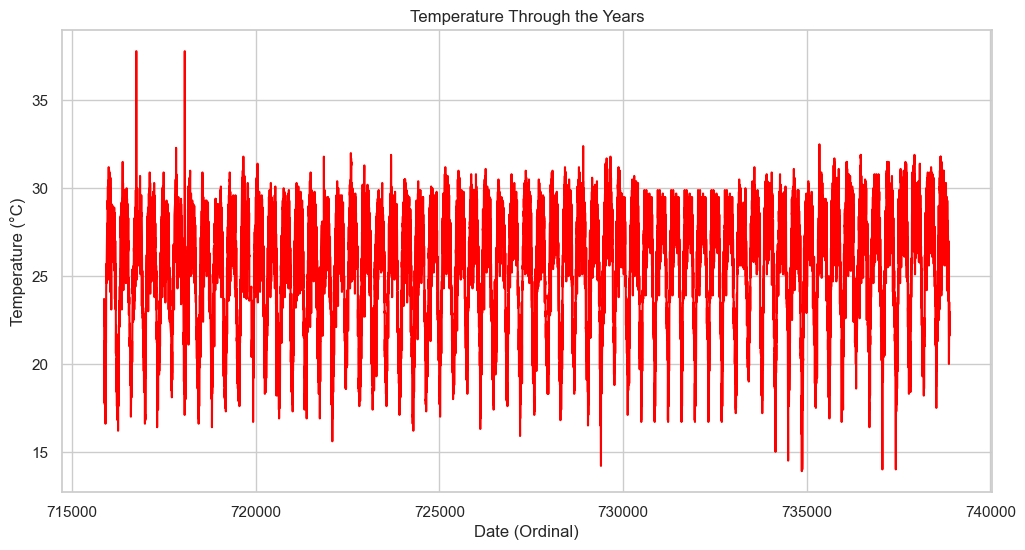

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature', data=data, color='red')
plt.title('Temperature Through the Years')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Temperature (°C)')
plt.show()

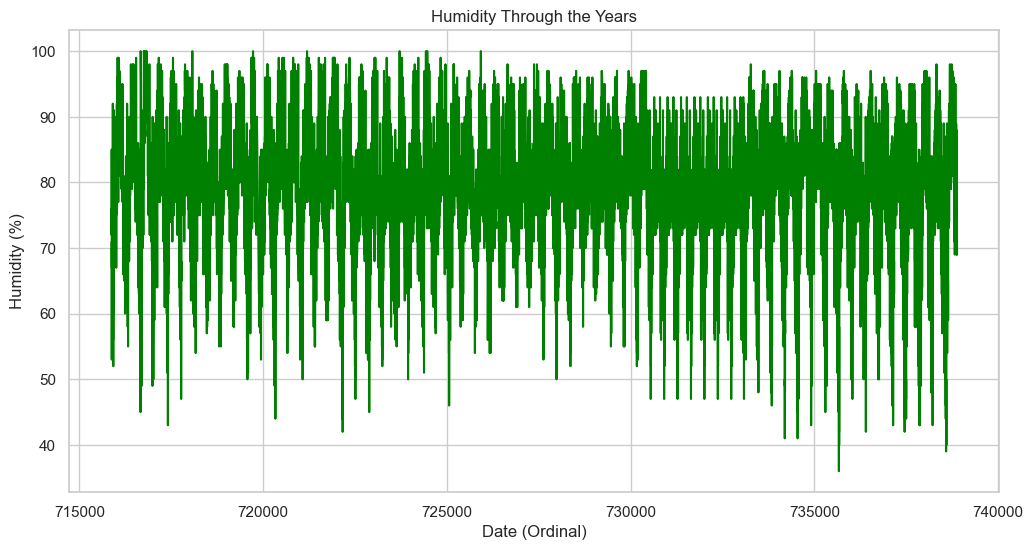

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Humidity', data=data, color='green')
plt.title('Humidity Through the Years')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Humidity (%)')
plt.show()

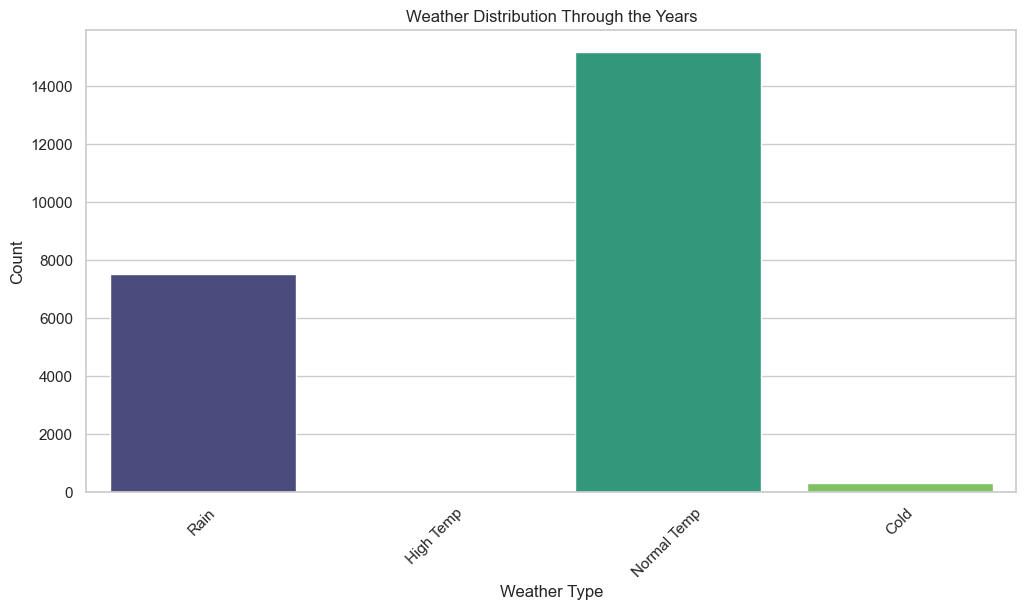

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather', data=data, palette='viridis')
plt.title('Weather Distribution Through the Years')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Rain', 'High Temp', 'Normal Temp', 'Cold'], rotation=45)
plt.show()

Text(0.5, 0.92, 'Rainfall vs. Humidity vs. Sunshine')

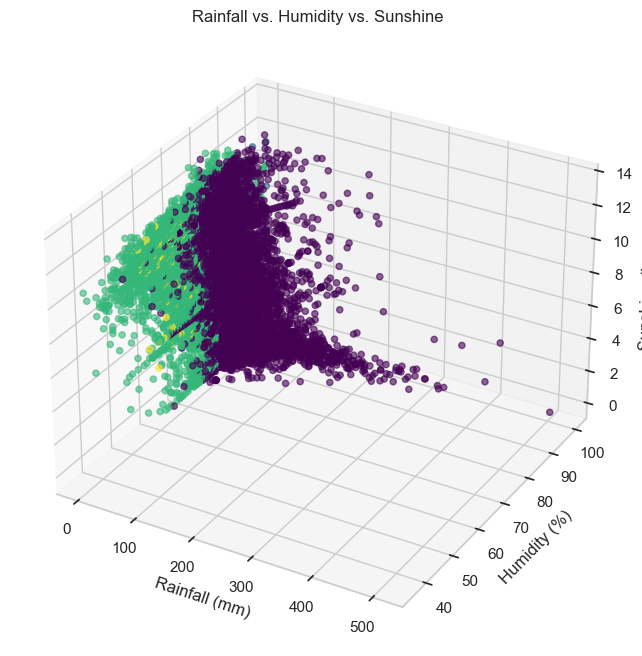

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ensure 'Weather' is numeric for coloring
scatter = ax.scatter(
    data['Rainfall'], 
    data['Humidity'], 
    data['Sunshine'], 
    c=data['Weather'], 
    cmap='viridis', 
    marker='o', 
    alpha=0.6
)

ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Sunshine (hours)')
ax.set_title('Rainfall vs. Humidity vs. Sunshine')

In [21]:
legend_labels = ['Rain', 'High Temp', 'Normal Temp', 'Cold']
handles, _ = scatter.legend_elements()
ax.legend(handles, legend_labels, title="Weather Type")

plt.show()

In [22]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Rainfall       0
Sunshine       0
Humidity       0
Temperature    0
Weather        0
Date           0
dtype: int64


In [23]:
numerical_columns = ['Rainfall', 'Temperature', 'Humidity', 'Sunshine', 'Date']
for col in numerical_columns:
    if data[col].isnull().any():
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{col}' with median value: {median_value}")
    else:
        print(f"No missing values in '{col}'.")


No missing values in 'Rainfall'.
No missing values in 'Temperature'.
No missing values in 'Humidity'.
No missing values in 'Sunshine'.
No missing values in 'Date'.


In [24]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Rainfall       0
Sunshine       0
Humidity       0
Temperature    0
Weather        0
Date           0
dtype: int64


In [25]:
X = data.drop(columns=['Weather'])
y = data['Weather']

In [26]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:
print("\nScaled Features Head:")
display(X_scaled.head())


Scaled Features Head:


,Rainfall,Sunshine,Humidity,Temperature,Date
0,-0.333648,-1.856455,-0.337069,-1.079464,-1.731976
1,-0.333648,-0.602124,-0.810379,-0.637203,-1.731825
2,-0.333648,-1.916185,0.727877,-1.049980,-1.731674
3,-0.333648,0.413286,0.254567,-0.814108,-1.731524
4,-0.333648,0.771667,-3.058598,-1.462757,-1.731373


In [28]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [29]:
print("\nClass Distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts().sort_index())


Class Distribution after SMOTE:
Weather
0    15166
1    15166
2    15166
3    15166
Name: count, dtype: int64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [31]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [32]:
print("\nClass Distribution in Training Set after SMOTE:")
print(pd.Series(y_train_resampled).value_counts().sort_index())


Class Distribution in Training Set after SMOTE:
Weather
0    12133
1    12133
2    12133
3    12133
Name: count, dtype: int64


In [33]:
print("\nClass Distribution in Test Set:")
print(pd.Series(y_test).value_counts().sort_index())


Class Distribution in Test Set:
Weather
0    1505
1       2
2    3033
3      62
Name: count, dtype: int64


In [34]:
if 'X_train_resampled' not in locals():
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, 
        test_size=0.2, 
        random_state=42, 
        stratify=y_resampled
    )
    print("\nPerformed train-test split with SMOTE applied on the entire dataset.")
else:
    X_train, X_test, y_train, y_test = X_train_resampled, X_test, y_train_resampled, y_test
    print("\nPerformed train-test split with SMOTE applied only on the training set.")


Performed train-test split with SMOTE applied only on the training set.


In [35]:
print("\nTraining Set Class Distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nTesting Set Class Distribution:")
print(pd.Series(y_test).value_counts().sort_index())


Training Set Class Distribution:
Weather
0    12133
1    12133
2    12133
3    12133
Name: count, dtype: int64

Testing Set Class Distribution:
Weather
0    1505
1       2
2    3033
3      62
Name: count, dtype: int64


In [36]:
#RandomizedSearchCV
import xgboost as xgb
param_distributions = {
    'Random Forest': {
        'n_estimators': randint(100, 500),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    'Logistic Regression': {
        'C': uniform(0.01, 100),
        'penalty': ['l2'],  # 'l1' can be added if desired
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.8, 0.2)
    },
    'XGBoost': {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.8, 0.2),
        'colsample_bytree': uniform(0.8, 0.2)
    }
}

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

missing_keys = set(models.keys()) - set(param_distributions.keys())
if missing_keys:
    print(f"Error: The following models are missing in param_distributions: {missing_keys}")
else:
    print("\nAll model keys are present in param_distributions. Proceeding with hyperparameter tuning.")



All model keys are present in param_distributions. Proceeding with hyperparameter tuning.


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Initialize the best_models dictionary
best_models = {}

if 'Random Forest' not in param_distributions:
    print("Error: 'Random Forest' parameters are not defined in param_distributions.")
else:
    print("\nStarting hyperparameter tuning for 'Random Forest'...")

    rf_model = RandomForestClassifier(random_state=42)

    rf_random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_distributions['Random Forest'],
        n_iter=20,  # Number of parameter settings sampled
        cv=3,        # Number of cross-validation folds
        verbose=2,   # Controls the verbosity: the higher, the more messages
        random_state=42,
        n_jobs=-1,   # Number of jobs to run in parallel
        scoring='accuracy'
    )

    try:
        rf_random_search.fit(X_train_resampled, y_train_resampled)
        # Add the best estimator to best_models
        best_models['Random Forest'] = rf_random_search.best_estimator_
        print(f"\nBest parameters for Random Forest: {rf_random_search.best_params_}")
        print(f"Best cross-validation accuracy for Random Forest: {rf_random_search.best_score_:.4f}")
    except Exception as e:
        print(f"An error occurred while tuning Random Forest: {e}")



Starting hyperparameter tuning for 'Random Forest'...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 288}
Best cross-validation accuracy for Random Forest: 1.0000


In [41]:

if 'Random Forest' in best_models:
    print("\n'Random Forest' has been successfully added to best_models.")
else:
    print("\nFailed to add 'Random Forest' to best_models.")



'Random Forest' has been successfully added to best_models.


In [42]:
from sklearn.ensemble import VotingClassifier


required_models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting', 'XGBoost']
missing_best_models = [model for model in required_models if model not in best_models]

if not missing_best_models:
   
    voting_clf = VotingClassifier(
        estimators=[
            ('rf', best_models['Random Forest']),
            ('lr', best_models['Logistic Regression']),
            ('svm', best_models['SVM']),
            ('gb', best_models['Gradient Boosting']),
            ('xgb', best_models['XGBoost'])
        ],
        voting='soft'
    )
    
    print("\nVotingClassifier has been successfully created.")
else:
    print(f"\nCannot create VotingClassifier. Missing best models: {missing_best_models}")



Cannot create VotingClassifier. Missing best models: ['Logistic Regression', 'SVM', 'Gradient Boosting', 'XGBoost']


In [43]:
from scipy.stats import randint, uniform


param_distributions.update({
    'Logistic Regression': {
        'C': uniform(0.01, 100),
        'penalty': ['l2'],  # 'l1' can be included if desired
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': uniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.8, 0.2)
    },
    'XGBoost': {
        'n_estimators': randint(100, 300),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'subsample': uniform(0.8, 0.2),
        'colsample_bytree': uniform(0.8, 0.2)
    }
})


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


models.update({
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
})


In [45]:
from sklearn.model_selection import RandomizedSearchCV


n_iter_search = 20


for model_name in ['Logistic Regression', 'SVM', 'Gradient Boosting', 'XGBoost']:
    model = models[model_name]
    print(f"\nTuning hyperparameters for {model_name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=n_iter_search,
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1,
        scoring='accuracy'
    )
    try:
        random_search.fit(X_train_resampled, y_train_resampled)
        best_models[model_name] = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best cross-validation accuracy for {model_name}: {random_search.best_score_:.4f}")
    except KeyError as e:
        print(f"KeyError: {e}. Please ensure that '{e.args[0]}' is a key in param_distributions.")
    except Exception as e:
        print(f"An error occurred while tuning {model_name}: {e}")



Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 97.38555188414593, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.9982

Tuning hyperparameters for SVM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for SVM: {'C': 7.41993941811405, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.9993

Tuning hyperparameters for Gradient Boosting...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.0849080237694725, 'max_depth': 7, 'n_estimators': 114, 'subsample': 0.9463987883622811}
Best cross-validation accuracy for Gradient Boosting: 1.0000

Tuning hyperparameters for XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8312037280884873, '

In [46]:

print("\nCurrent models in best_models:")
print(best_models.keys())


required_models = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting', 'XGBoost']
missing_best_models = [model for model in required_models if model not in best_models]

if not missing_best_models:
    print("\nAll models have been successfully tuned and added to best_models.")
else:
    print(f"\nThe following models are still missing in best_models: {missing_best_models}")



Current models in best_models:
dict_keys(['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting', 'XGBoost'])

All models have been successfully tuned and added to best_models.


In [47]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def evaluate_model_detailed(model, X_test, y_test, model_name):
    try:
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
        precision = precision_score(y_test, y_pred, average='weighted') * 100
        recall = recall_score(y_test, y_pred, average='weighted') * 100
        f1 = f1_score(y_test, y_pred, average='weighted') * 100
        
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {acc:.2f}%")
        print(f"Precision: {precision:.2f}%")
        print(f"Recall: {recall:.2f}%")
        print(f"F1-Score: {f1:.2f}%")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Rain', 'High Temperature', 'Normal Temperature', 'Cold']))
        
        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Rain', 'High Temp', 'Normal Temp', 'Cold'], 
                    yticklabels=['Rain', 'High Temp', 'Normal Temp', 'Cold'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        return {'Accuracy (%)': acc, 'Precision (%)': precision, 'Recall (%)': recall, 'F1-Score (%)': f1}
    except Exception as e:
        print(f"An error occurred while evaluating {model_name}: {e}")
        return None



Model: Random Forest
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      1.00      1.00      3033
              Cold       1.00      1.00      1.00        62

          accuracy                           1.00      4602
         macro avg       1.00      1.00      1.00      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


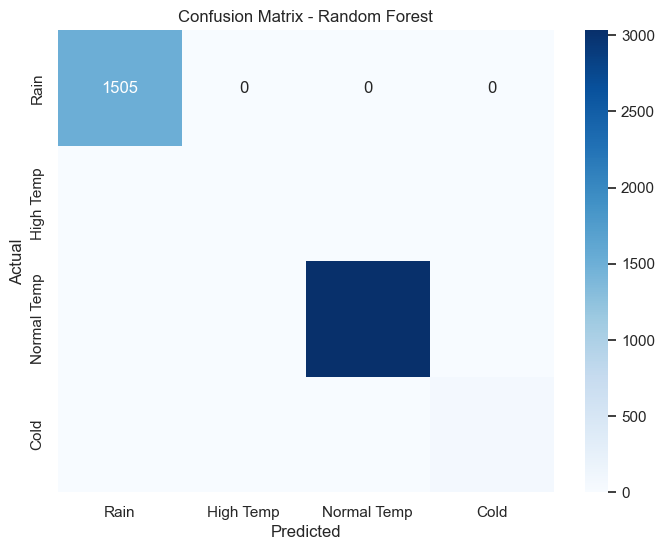


Model: Logistic Regression
Accuracy: 99.61%
Precision: 99.69%
Recall: 99.61%
F1-Score: 99.63%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      0.99      1.00      3033
              Cold       0.78      1.00      0.88        62

          accuracy                           1.00      4602
         macro avg       0.95      1.00      0.97      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


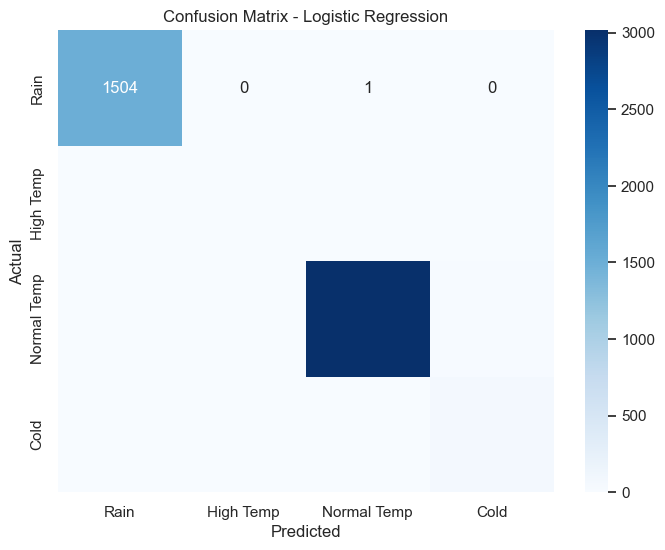


Model: SVM
Accuracy: 99.80%
Precision: 99.82%
Recall: 99.80%
F1-Score: 99.81%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      1.00      1.00      3033
              Cold       0.89      1.00      0.94        62

          accuracy                           1.00      4602
         macro avg       0.97      1.00      0.98      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


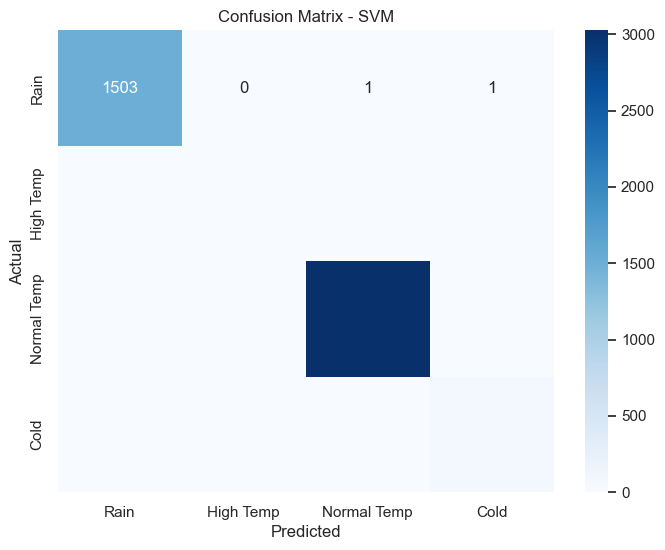


Model: Gradient Boosting
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      1.00      1.00      3033
              Cold       1.00      1.00      1.00        62

          accuracy                           1.00      4602
         macro avg       1.00      1.00      1.00      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


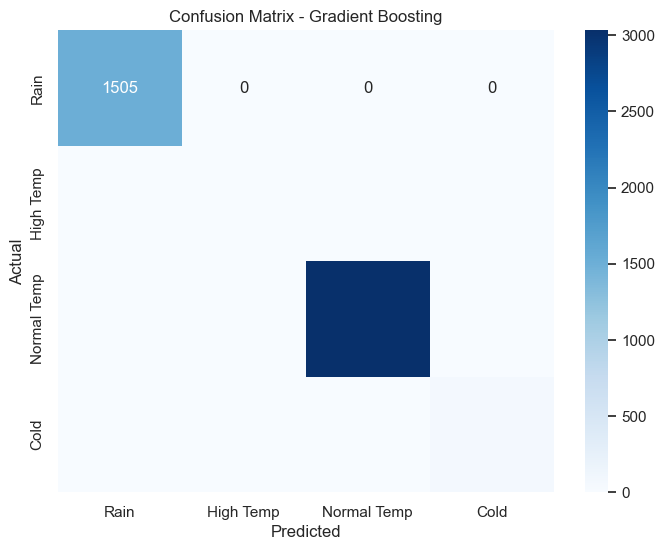


Model: XGBoost
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-Score: 100.00%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      1.00      1.00      3033
              Cold       1.00      1.00      1.00        62

          accuracy                           1.00      4602
         macro avg       1.00      1.00      1.00      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


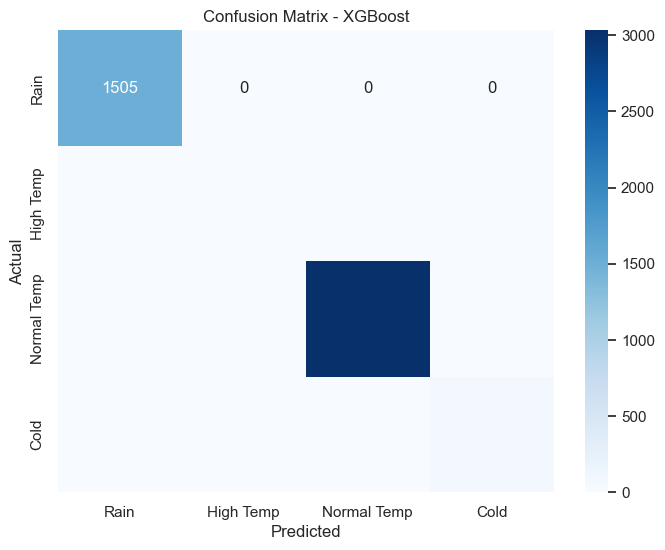

In [48]:

model_accuracies = {}
for model_name, model in best_models.items():
    metrics = evaluate_model_detailed(model, X_test, y_test, model_name)
    if metrics is not None:
        model_accuracies[model_name] = metrics


In [49]:

detailed_performance_df = pd.DataFrame.from_dict(model_accuracies, orient='index')
detailed_performance_df = detailed_performance_df.reset_index().rename(columns={'index': 'Model'})


print("\nDetailed Model Performance Comparison:")
display(detailed_performance_df)



Detailed Model Performance Comparison:


,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,Random Forest,100.000000,100.000000,100.000000,100.000000
1,Logistic Regression,99.608866,99.688243,99.608866,99.630614
2,SVM,99.804433,99.824257,99.804433,99.809600
3,Gradient Boosting,100.000000,100.000000,100.000000,100.000000
4,XGBoost,100.000000,100.000000,100.000000,100.000000


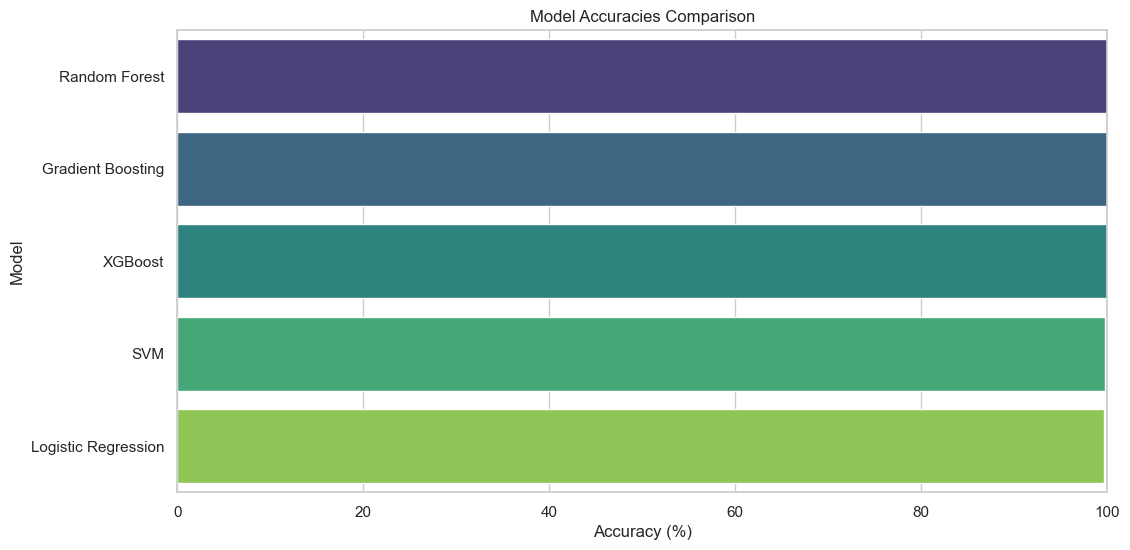

In [50]:

performance_df_sorted = detailed_performance_df.sort_values(by='Accuracy (%)', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy (%)', y='Model', data=performance_df_sorted, palette='viridis')
plt.title('Model Accuracies Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.show()


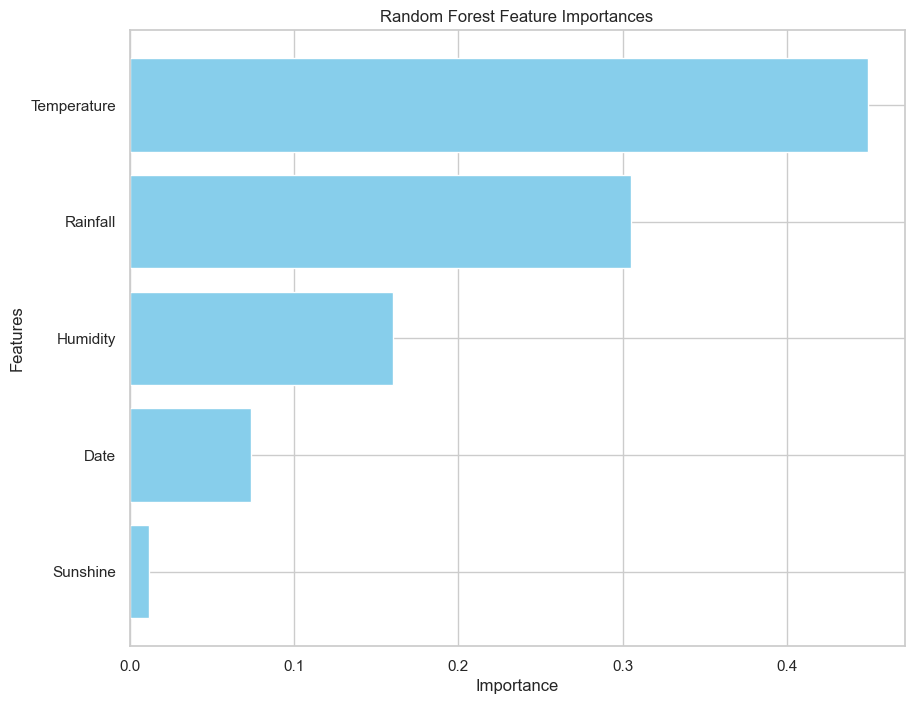

In [51]:

rf_model = best_models['Random Forest']
rf_importances = rf_model.feature_importances_
rf_features = X.columns
rf_sorted_indices = rf_importances.argsort()

plt.figure(figsize=(10, 8))
plt.title('Random Forest Feature Importances')
plt.barh(rf_features[rf_sorted_indices], rf_importances[rf_sorted_indices], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


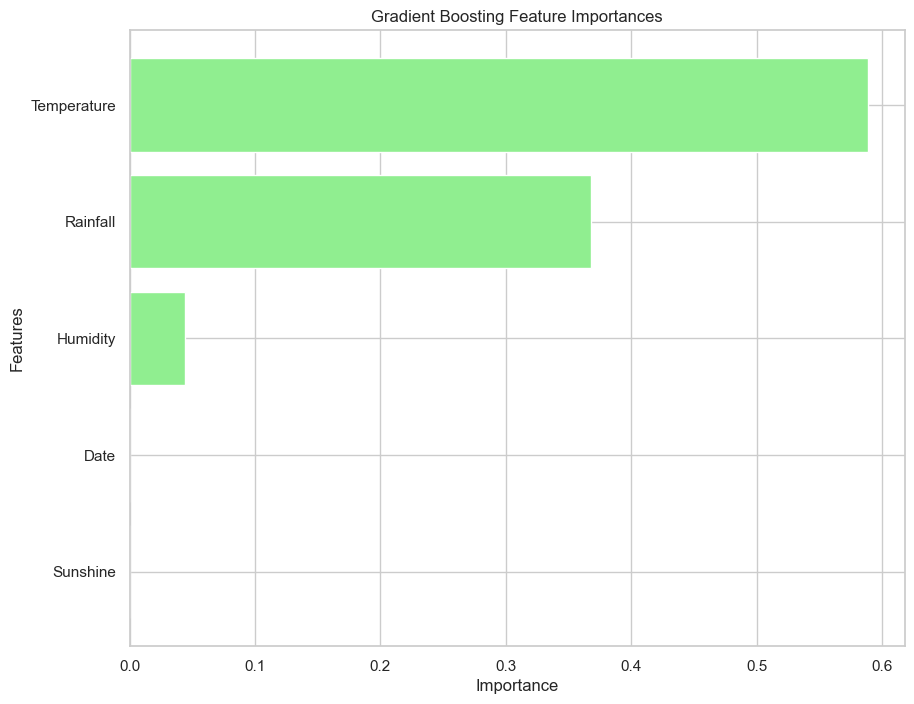

In [52]:

gb_model = best_models['Gradient Boosting']
gb_importances = gb_model.feature_importances_
gb_features = X.columns
gb_sorted_indices = gb_importances.argsort()

plt.figure(figsize=(10, 8))
plt.title('Gradient Boosting Feature Importances')
plt.barh(gb_features[gb_sorted_indices], gb_importances[gb_sorted_indices], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


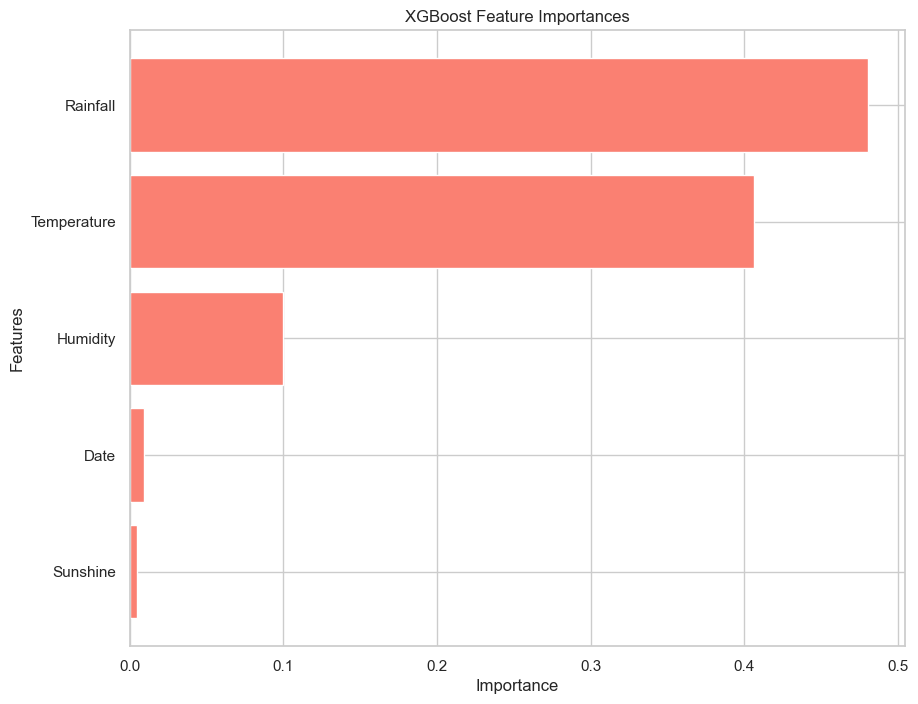

In [53]:

xgb_model = best_models['XGBoost']
xgb_importances = xgb_model.feature_importances_
xgb_features = X.columns
xgb_sorted_indices = xgb_importances.argsort()

plt.figure(figsize=(10, 8))
plt.title('XGBoost Feature Importances')
plt.barh(xgb_features[xgb_sorted_indices], xgb_importances[xgb_sorted_indices], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


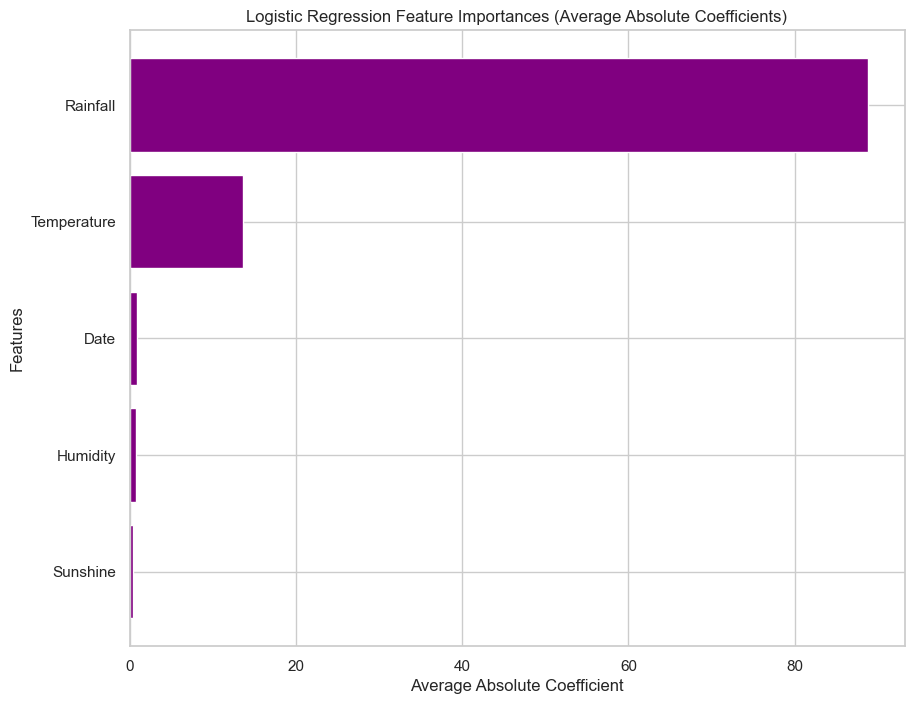

In [54]:
lr_model = best_models['Logistic Regression']
lr_coefficients = lr_model.coef_
lr_features = X.columns

lr_importances = np.mean(np.abs(lr_coefficients), axis=0)
lr_sorted_indices = lr_importances.argsort()

plt.figure(figsize=(10, 8))
plt.title('Logistic Regression Feature Importances (Average Absolute Coefficients)')
plt.barh(lr_features[lr_sorted_indices], lr_importances[lr_sorted_indices], color='purple')
plt.xlabel('Average Absolute Coefficient')
plt.ylabel('Features')
plt.show()


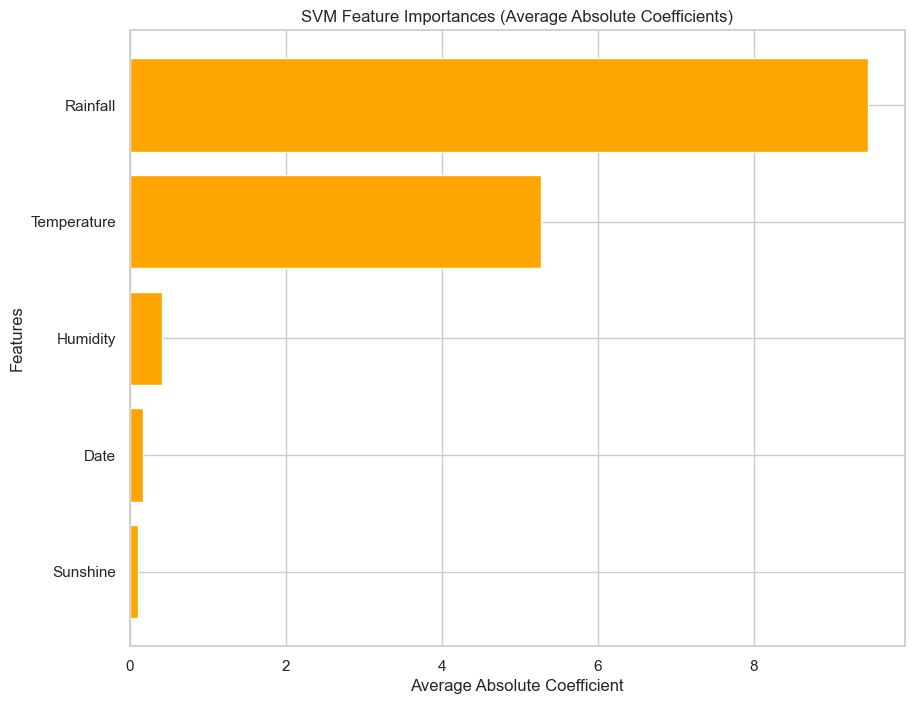

In [55]:
svm_model = best_models['SVM']
if svm_model.kernel == 'linear':
    svm_coefficients = svm_model.coef_
    svm_features = X.columns
    
    svm_importances = np.mean(np.abs(svm_coefficients), axis=0)
    svm_sorted_indices = svm_importances.argsort()
    
    plt.figure(figsize=(10, 8))
    plt.title('SVM Feature Importances (Average Absolute Coefficients)')
    plt.barh(svm_features[svm_sorted_indices], svm_importances[svm_sorted_indices], color='orange')
    plt.xlabel('Average Absolute Coefficient')
    plt.ylabel('Features')
    plt.show()
else:
    print("\nSVM does not use a linear kernel. Feature importances are not available.")


In [56]:
detailed_performance_df = pd.DataFrame.from_dict(model_accuracies, orient='index')
detailed_performance_df = detailed_performance_df.reset_index().rename(columns={'index': 'Model'})

print("\nDetailed Model Performance Comparison:")
display(detailed_performance_df)



Detailed Model Performance Comparison:


,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,Random Forest,100.000000,100.000000,100.000000,100.000000
1,Logistic Regression,99.608866,99.688243,99.608866,99.630614
2,SVM,99.804433,99.824257,99.804433,99.809600
3,Gradient Boosting,100.000000,100.000000,100.000000,100.000000
4,XGBoost,100.000000,100.000000,100.000000,100.000000


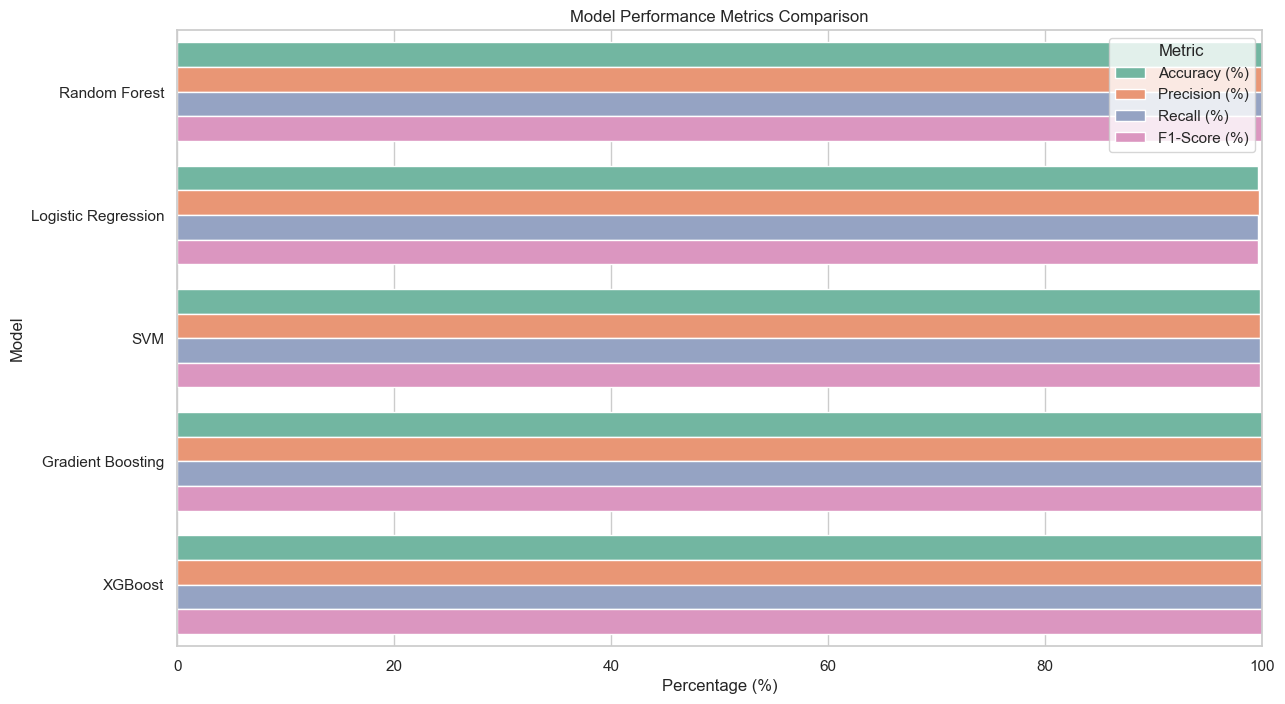

In [57]:
melted_df = detailed_performance_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=melted_df, palette='Set2')
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Percentage (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.legend(title='Metric')
plt.show()


In [58]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_models['Random Forest']),
        ('lr', best_models['Logistic Regression']),
        ('svm', best_models['SVM']),
        ('gb', best_models['Gradient Boosting']),
        ('xgb', best_models['XGBoost'])
    ],
    voting='soft'  # 'soft' uses predicted probabilities
)

print("\nVotingClassifier has been successfully created.")



VotingClassifier has been successfully created.


In [59]:

print("\nTraining the Voting Classifier...")
try:
    voting_clf.fit(X_train_resampled, y_train_resampled)
    print("Voting Classifier trained successfully.")
except Exception as e:
    print(f"An error occurred while training the Voting Classifier: {e}")



Training the Voting Classifier...
Voting Classifier trained successfully.


In [60]:
def evaluate_model(model, X_test, y_test, model_name):
    try:
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100  
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {acc:.2f}%")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Rain', 'High Temperature', 'Normal Temperature', 'Cold']))
        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Rain', 'High Temp', 'Normal Temp', 'Cold'], 
                    yticklabels=['Rain', 'High Temp', 'Normal Temp', 'Cold'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        return acc
    except Exception as e:
        print(f"An error occurred while evaluating {model_name}: {e}")
        return None



Model: Voting Classifier
Accuracy: 99.98%
Classification Report:
                    precision    recall  f1-score   support

              Rain       1.00      1.00      1.00      1505
  High Temperature       1.00      1.00      1.00         2
Normal Temperature       1.00      1.00      1.00      3033
              Cold       1.00      1.00      1.00        62

          accuracy                           1.00      4602
         macro avg       1.00      1.00      1.00      4602
      weighted avg       1.00      1.00      1.00      4602

Confusion Matrix:


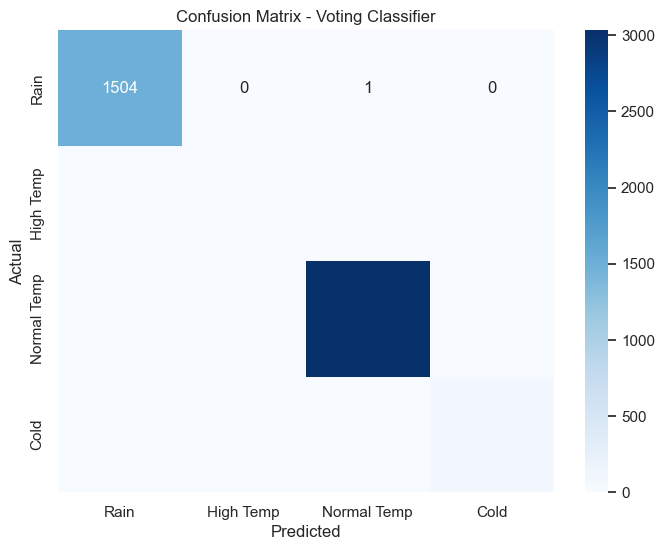

In [61]:
ensemble_accuracy = evaluate_model(voting_clf, X_test, y_test, 'Voting Classifier')
if ensemble_accuracy is not None:
    model_accuracies['Voting Classifier'] = ensemble_accuracy


In [70]:
import pandas as pd

# Check the structure of model_accuracies
print(model_accuracies)

# If it's not a nested dictionary, restructure it
if not isinstance(next(iter(model_accuracies.values())), dict):
    detailed_performance_df = pd.DataFrame(
        list(model_accuracies.items()), 
        columns=['Model', 'Accuracy']
    )
else:
    # If model_accuracies is already a nested dictionary
    detailed_performance_df = pd.DataFrame.from_dict(model_accuracies, orient='index')
    detailed_performance_df = detailed_performance_df.reset_index().rename(columns={'index': 'Model'})

print("\nDetailed Model Performance Comparison:")
print(detailed_performance_df)


model_accuracies content: {'Random Forest': {'Accuracy (%)': 100.0, 'Precision (%)': 100.0, 'Recall (%)': 100.0, 'F1-Score (%)': 100.0}, 'Logistic Regression': {'Accuracy (%)': 99.60886571056062, 'Precision (%)': 99.68824260249231, 'Recall (%)': 99.60886571056062, 'F1-Score (%)': 99.63061396944765}, 'SVM': {'Accuracy (%)': 99.80443285528031, 'Precision (%)': 99.82425692207151, 'Recall (%)': 99.80443285528031, 'F1-Score (%)': 99.80960015108144}, 'Gradient Boosting': {'Accuracy (%)': 100.0, 'Precision (%)': 100.0, 'Recall (%)': 100.0, 'F1-Score (%)': 100.0}, 'XGBoost': {'Accuracy (%)': 100.0, 'Precision (%)': 100.0, 'Recall (%)': 100.0, 'F1-Score (%)': 100.0}, 'Voting Classifier': 99.97827031725338}

Detailed Model Performance Comparison:
                 Model                                           Accuracy
0        Random Forest  {'Accuracy (%)': 100.0, 'Precision (%)': 100.0...
1  Logistic Regression  {'Accuracy (%)': 99.60886571056062, 'Precision...
2                  SVM  {'Accur

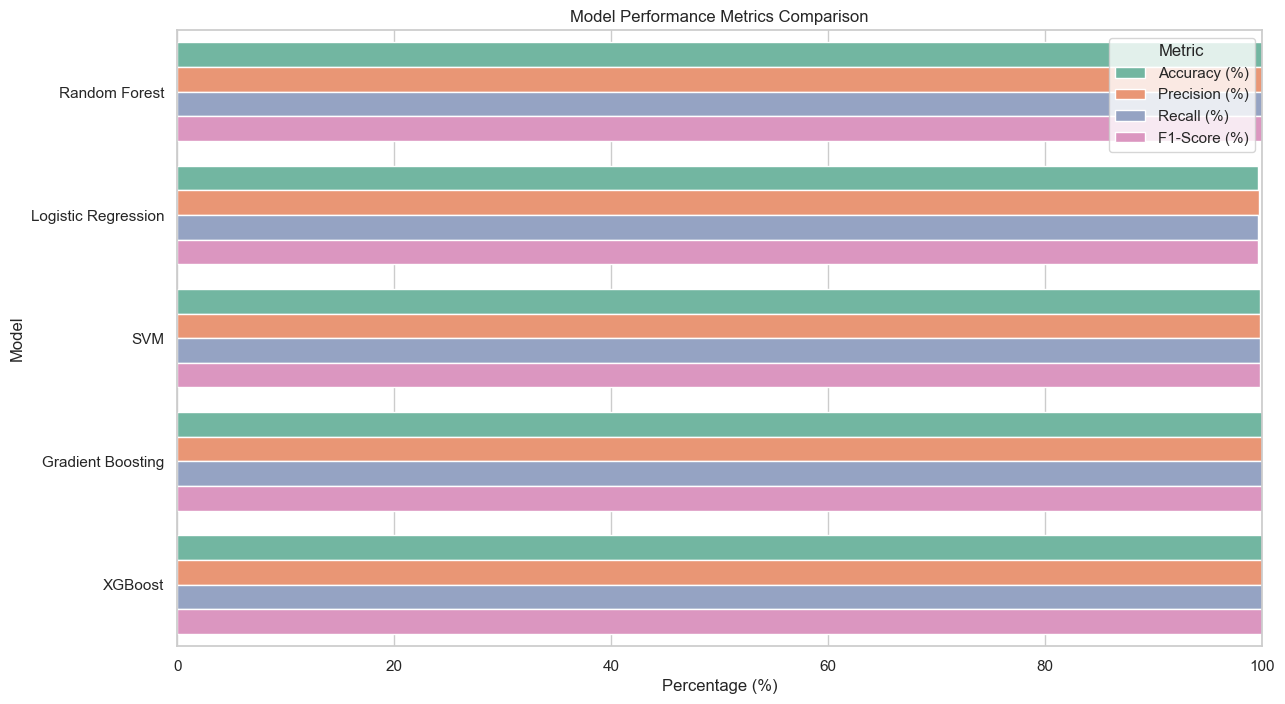

In [64]:
melted_df = detailed_performance_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=melted_df, palette='Set2')
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Percentage (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.legend(title='Metric')
plt.show()


In [65]:
print("\nMissing Values in Test Set:")
print(pd.Series(y_test).isnull().sum())



Missing Values in Test Set:
0


In [66]:
unique_train_classes = set(y_train_resampled)
unique_test_classes = set(y_test)
print("\nUnique Classes in Training Set:", unique_train_classes)
print("Unique Classes in Test Set:", unique_test_classes)

for cls in unique_train_classes:
    if cls not in unique_test_classes:
        print(f"Warning: Class {cls} is present in the training set but not in the test set.")



Unique Classes in Training Set: {0, 1, 2, 3}
Unique Classes in Test Set: {0, 1, 2, 3}


In [1]:
if 'Voting Classifier' in model_accuracies and len(model_accuracies) > 1:
    # Access the accuracy directly without subscript
    ensemble_accuracy = model_accuracies['Voting Classifier']
    
    best_individual_accuracy = max([acc for model, acc in model_accuracies.items() if model != 'Voting Classifier'])

    print(f"\nEnsemble Voting Classifier Accuracy: {ensemble_accuracy:.2f}%")
    print(f"Best Individual Model Accuracy: {best_individual_accuracy:.2f}%")

    if ensemble_accuracy >= best_individual_accuracy:
        print("Ensemble model performs at least as well as the best individual model.")
    else:
        print("Ensemble model does not outperform the best individual model.")
else:
    print("\nInsufficient models to compare ensemble performance.")


NameError: name 'model_accuracies' is not defined

In [68]:
detailed_performance_df = pd.DataFrame.from_dict(model_accuracies, orient='index')
detailed_performance_df = detailed_performance_df.reset_index().rename(columns={'index': 'Model'})

print("\nDetailed Model Performance Comparison:")
display(detailed_performance_df)


AttributeError: 'numpy.float64' object has no attribute 'items'

In [69]:
import joblib
top_models = ['Random Forest', 'Gradient Boosting', 'XGBoost']

for model_name in top_models:
    if model_name in best_models:
        model = best_models[model_name]
        filename = f'best_{model_name.replace(" ", "_").lower()}.joblib'
        joblib.dump(model, filename)
        print(f"Saved {model_name} as '{filename}'")
    else:
        print(f"Warning: {model_name} not found in best_models dictionary.")


Saved Random Forest as 'best_random_forest.joblib'
Saved Gradient Boosting as 'best_gradient_boosting.joblib'
Saved XGBoost as 'best_xgboost.joblib'
